In [199]:
import glob
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [187]:
def get_dir_list():
    return glob.glob('data/raw/*_*_0[1-4]*')

In [283]:
def get_file_list_in_dir(d):
    f = glob.glob(d + '/*.csv')
    f.sort()
    return f

In [311]:
def get_df_from_csv(f):
    is_iOS = "iphone" in f
    df = pd.read_csv(f)
    print("====== " + f)

    if is_iOS:
        df.rename(columns={'rssi': 'remote_rssi'}, inplace=True)
    else:
        # rename culumn name
        df.rename(columns={'rssi(A)': 'rssi.a'}, inplace=True)
        df.rename(columns={'rssi(B)': 'rssi.b'}, inplace=True)

        # remove unsaved parameters
        del df['temperature']
        del df['humidity']
        del df['proximity']

    # remove data while rssi is not recorded
    buf = np.where(df['rssi.a'].as_matrix() != -1)[0]
    if len(buf) == 0:
        return None
    first_rssi_idx = buf[0]
    df = df.ix[first_rssi_idx:, :]

    # adjust the value of button pushed data 
    df.loc[df['btn_push'] == -1, 'btn_push'] = 0

    # convert -1 to NaN
    df[df == -1] = np.nan

    # interpolate NaN
    df = df.apply(pd.Series.interpolate)

    return df

In [312]:
def get_df_list_from_dir(d):
    print(d)
    file_list = get_file_list_in_dir(d)
    df_list = [get_df_from_csv(f) for f in file_list]
    return df_list

In [313]:
d = get_dir_list()
# directory only saved on XperiaZ3
d_XperiaZ3 = [_d for _d in d if 'iphone' not in _d]

title = [os.path.basename(_d) for _d in d_XperiaZ3]
df_list_list = [get_df_list_from_dir(_d) for _d in d_XperiaZ3]
len(df_list)

#df_dic = dict(zip(title, df_list_list))
#df_dic['01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅']

data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅
====== data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅/20170406142237_sk01.csv
====== data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅/20170406142303_sk02.csv
====== data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅/20170406142339_sk03.csv
====== data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅/20170406142426_sk04.csv
====== data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅/20170406142459_sk05.csv
====== data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅/20170406142531_sk06.csv
====== data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅/20170406142600_sk07.csv
====== data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅/20170406142630_sk08.csv
====== data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅/20170406142700_sk09.csv
====== data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅/20170406142730_sk10.csv
====== data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅/20170406142800_sk11.csv
====== data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅/20

30

In [314]:
df_list_list[3][2]

,date,rssi.a,rssi.b,remote_rssi,linear_accel[0],linear_accel[1],linear_accel[2],accelerometer[0],accelerometer[1],accelerometer[2],...,game_rotation[0],game_rotation[1],game_rotation[2],game_rotation[3],magnetic[0],magnetic[1],magnetic[2],pressure,light,btn_push
144,2017/04/06 16:16:55.879,-57.000000,-57.000000,-72.0,0.090062,0.007859,-0.096837,0.678116,2.527664,9.317993,...,0.117796,0.066957,0.685577,0.715280,-17.452430,-5.075645,-32.830430,1017.77060,NaN,0.0
145,2017/04/06 16:16:55.901,-62.500000,-62.500000,-72.0,0.027184,0.001751,0.126390,0.623276,2.452743,9.486053,...,0.117002,0.066618,0.685788,0.715240,-17.997360,-5.348206,-32.566643,1017.77060,NaN,0.0
146,2017/04/06 16:16:55.917,-68.000000,-68.000000,-74.0,-0.050502,-0.005406,0.113580,0.610519,2.507950,9.405869,...,0.116377,0.066479,0.686021,0.715130,-17.997360,-5.075645,-32.918167,1017.77060,NaN,0.0
147,2017/04/06 16:16:55.943,-69.000000,-69.000000,-74.0,0.016982,0.025623,-0.035125,0.634308,2.538635,9.297440,...,0.116216,0.066531,0.686260,0.714923,-18.088150,-5.302811,-33.093929,1017.77060,NaN,0.0
148,2017/04/06 16:16:55.958,-70.000000,-70.000000,-60.0,0.015302,0.053320,-0.018394,0.645081,2.457474,9.363739,...,0.116158,0.066451,0.686655,0.714560,-18.178940,-5.529976,-33.269690,1017.77562,NaN,0.0
149,2017/04/06 16:16:55.982,-65.666667,-65.666667,-60.0,0.039847,-0.041450,-0.015932,0.682281,2.470200,9.291763,...,0.116101,0.066299,0.686933,0.714316,-18.224430,-5.575371,-33.401584,1017.78064,NaN,0.0
150,2017/04/06 16:16:56.001,-61.333333,-61.333333,-60.0,0.030210,0.054961,-0.088938,0.713425,2.533646,9.391617,...,0.116142,0.066144,0.687240,0.714029,-18.269920,-5.620766,-33.533478,1017.78064,NaN,0.0
151,2017/04/06 16:16:56.017,-57.000000,-57.000000,-63.0,0.108806,-0.055920,0.065052,0.745163,2.434784,9.407074,...,0.116437,0.065632,0.687613,0.713669,-18.269920,-5.620766,-33.621407,1017.78064,NaN,0.0
152,2017/04/06 16:16:56.041,-58.500000,-58.500000,-63.0,0.037272,-0.001758,0.064239,0.658386,2.518662,9.369797,...,0.116505,0.065377,0.687816,0.713485,-18.179130,-5.529976,-33.709335,1017.79060,208.000000,0.0
153,2017/04/06 16:16:56.061,-60.000000,-60.000000,-70.0,0.079491,0.060889,-0.015389,0.711777,2.545166,9.310059,...,0.116783,0.065247,0.688146,0.713134,-17.815780,-5.257416,-34.061050,1017.78562,207.941176,0.0


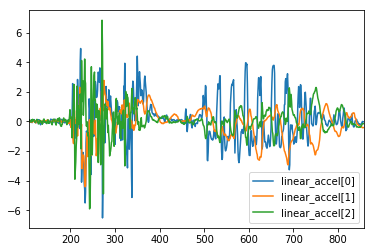

In [186]:
df[['linear_accel[0]','linear_accel[1]','linear_accel[2]']].plot()